In [1]:
from math import *
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

## Partie Algorithmie

### Création du vecteur de départ

page numéroté num 156

In [2]:
def alpha(p):
    i = np.arange(p+1)
    return (1/2) * (1 - np.cos( (2*i+1)*np.pi / (2*p+1)))

In [3]:
def beta(p):
    i = np.arange(p+1)
    return (1/2) * (1 - np.cos( 2*i*np.pi / (2*p+1)))

page numéroté num 157

In [4]:
def start_point(p):
    I = np.zeros((2*(p+1),1))
    I[:p+1,0] = alpha(p)
    I[p+1:,0] = beta(p)
    return I

### Création de la Jacobienne

page numéroté num 157 puis 163

In [5]:
def a_prime_beta(p) : 
    #i verif
    i = np.arange(0,p) + 1
    #eta verif
    eta = ((2*(p-i)+1)*np.pi) / (2*p+1)
    
    #left et right verif
    left = (2*p*np.cos(p*eta)) / (np.cos(eta) + 1)
    right = (np.sin(p*eta) / np.sin(eta)) * ( 2*p + 2/(np.cos(eta) + 1))
    return left + right

In [6]:
def b_prime_alpha(p) :
    #i et teta vérif
    i = np.arange(0,p)
    teta = ( 2*(p-i)*np.pi) / (2*p+1)
    
    #left et right vérif
    left = (2*p*np.cos(p*teta)) / (np.cos(teta) - 1)
    right = (np.sin(p*teta) / np.sin(teta)) * ( 2*p - 2/(np.cos(teta) - 1))
    return left + right

In [7]:
def Jacobian_X0(p,h, x,function,eps) : 
    f = function(x,h)
    f_max = np.max(f)
    f_eps = max(f_max, eps)
    I = np.zeros(2*p)

    I[:p] = a_prime_beta(p)
    I[p:] = b_prime_alpha(p)
  
    return np.sqrt(f_eps)*np.diag(I)

### Création de l'interpolation a et b 

page numéroté num 155

In [8]:
def a(x,alpha,h, p,function, eps):
    som = 0
    for i in range(p+1):
        mul = 1 
        for j in range(p+1) :
            if i != j :
                mul = mul * ((x - alpha[j]) / (alpha[i] - alpha[j])) 
        inter = (-1)**(i+p)* np.sqrt(max(function(alpha[i],h),eps) / alpha[i]) * mul
        som += inter
    return som

In [142]:
def b(x,beta,h,p, function,eps):
    som = 0
    for i in range(p+1) : 
        mul = 1 
        for j in range(p+1) : 
            if i != j :
                mul = mul * ((x - beta[j]) / (beta[i] - beta[j]))
        som += (-1)**(i+p) * sqrt(max(function(beta[i],h), eps) / ( 1 - beta[i])) * mul
    return som

### Vecteur têta

page numéroté num 155

In [10]:
def teta_teta(x, h, p, function,eps) : 
    teta = np.zeros((2*p,1))
    alpha = x[:p]
    alpha_new = np.concatenate(( alpha, [[1]]))
    beta = x[p:]
    beta_new = np.concatenate(([[0]],beta))
    
    teta[p:] = a(beta, alpha_new, h, p, function, eps) 
    teta[:p] = b(alpha, beta_new, h, p, function,eps)
    return teta 

### Splitting node 

### Algorithme Newton-Raphson

page numéroté num 155

In [11]:
def G_hat(x,h, p, function,eps) : 
    J = Jacobian_X0(p,h,x, function, eps)
    tet = teta_teta(x, h, p, function,eps)
    d = npl.solve(J,tet)
    return x - d

In [12]:
def Newton_Raphson(p,h ,function,eps=1e-3)  :
    X0 = start_point(p)
    X = np.concatenate((X0[:p], X0[p+2:]))
    X_past = X + 2*eps
    err = 2*eps
    ERR = []
    i = 0
    while npl.norm(X-X_past)/npl.norm(X) > eps and i<1000:
        X_past = X
        X = G_hat(X,h,p,function,eps)
        i+=1
        ERR += [npl.norm(X - X_past)/npl.norm(X)]
    print("Nombre d'itérations finales : ",i)
    print("Erreur Newton-Raphson : ", ERR[-1])
    return X, ERR

### Création des points d'interpolation = Lukacs

In [13]:
def polynom(x, a, b):
    sol = x*(a**2) +(1-x)*(b**2)
    return sol

### Affichage du polynome

In [68]:
def polynom_display(xn,poln, x, pol,h, real_func):
    x0 = np.linspace(0,1,100)
    
    plt.figure()
    plt.plot(x, pol, '-b')
    plt.plot(xn,poln, 'ob', label ="Points d'interpolation")
    plt.plot(x0, real_func(x0,h), '-r', label = "Fonction à interpoler")
    plt.legend()
    plt.show()   

### Interpolation par un polynome

In [69]:
def interpol(p,h,function, eps=1e-3) :
    X, ERR = Newton_Raphson(p, h, function, eps)
    X = np.concatenate((X[:p], [[1]], [[0]], X[p:]))
    
    xn = np.zeros((p+1,1))
    xn[:,0] = np.linspace(0,1,p+1)
    
    ar = X[:p+1]
    br = X[p+1:]
    
    A = a(xn, ar, h, p, function,eps )
    B = b(xn, br, h, p, function,eps )
    poln = polynom(xn, A, B)

    x = np.linspace(0,1,300)
    A_pol = a(x, ar, h, p ,function, eps)
    B_pol = b(x, br, h, p ,function, eps)
    pol = polynom(x, A_pol, B_pol)

    
    return poln, xn, ERR, pol, x

## Partie test

### Test des fonctions dans le polynome

In [70]:
def fi(x,h):
    x = x*h
    return x**2+1

Nombre d'itérations finales :  1
Erreur Newton-Raphson :  5.124342834815187e-05


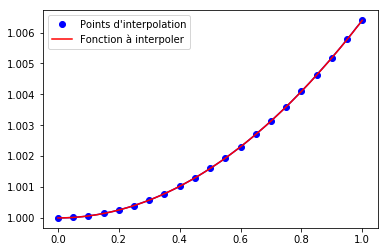

La convergence est rapide.


In [74]:
p = 20
h = 0.08
poln, xn, error, pol, x = interpol(p,h, fi)
polynom_display(xn,poln,x ,pol,h,fi)

error = np.asarray(error)
if len(error) > 3 :
    plt.figure()
    plt.plot(error)
    plt.title("Evolution de l'erreur")
    plt.show()
else :
    print("La convergence est rapide.")

In [124]:
def ab(x,h) : 
    x= x*h
    return np.abs(x-0.5*h)

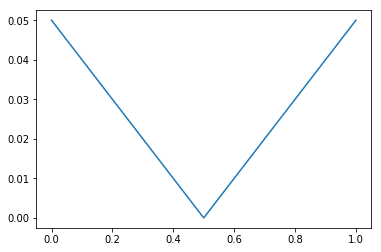

In [143]:
#Test de la fonction

x = np.linspace(0,1,21)
plt.figure()
plt.plot(x, ab(x,0.1))
plt.show()

Nombre d'itérations finales :  1000
Erreur Newton-Raphson :  0.013691755414312945


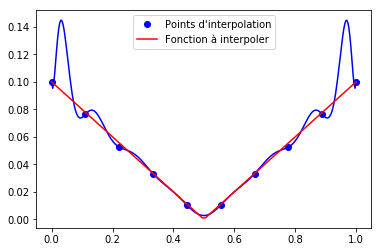

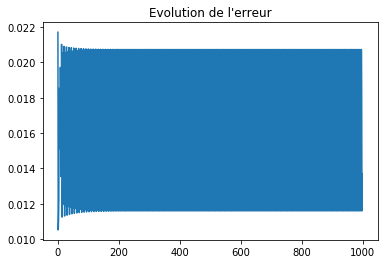

In [144]:
p = 9
h = 0.20
poln, xn, error, pol, x = interpol(p,h, ab)
polynom_display(xn,poln,x ,pol,h,ab)

error = np.asarray(error)
if len(error) > 3 :
    plt.figure()
    plt.plot(error)
    plt.title("Evolution de l'erreur")
    plt.show()
else :
    print("La convergence est rapide.")

Comme Beta[-1] dépasse 1, 1-beta est négatif et donc math error, besoin de contrôle sur nos noeuds pour p=11

In [77]:
def k(x,h) :
    x=x*h
    return 1/(1-x)

Nombre d'itérations finales :  3
Erreur Newton-Raphson :  0.0007752174976039524


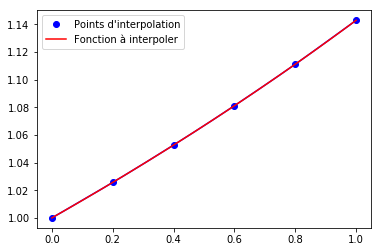

La convergence est rapide.


In [78]:
p = 5
h = 1/8
poln, xn, error, pol, x = interpol(p,h, k)
polynom_display(xn,poln,x ,pol,h,k)

error = np.asarray(error)
if len(error) > 3 :
    plt.figure()
    plt.plot(error)
    plt.title("Evolution de l'erreur")
    plt.show()
else :
    print("La convergence est rapide.")

In [79]:
def c(x,h) :
    x= x*h
    return (10**5)*(x**10)*(1-x)**7 + 0.01

Nombre d'itérations finales :  1
Erreur Newton-Raphson :  2.5633916303614585e-05


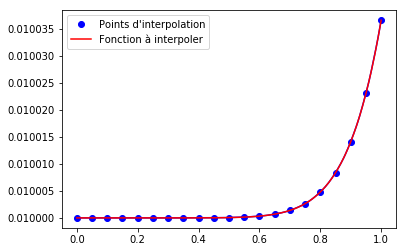

La convergence est rapide.


In [80]:
p = 20
h = 1/8
poln, xn, error, pol, x = interpol(p,h, c)
polynom_display(xn,poln , x, pol,h,c)


error = np.asarray(error)
if len(error) > 3 :
    plt.figure()
    plt.plot(error)
    plt.title("Evolution de l'erreur")
    plt.show()
else :
    print("La convergence est rapide.")

In [22]:
def m(x,h) :
    x = x*h
    return 1/(1+25*(2*x-1)**2)

Nombre d'itérations finales :  9
Erreur Newton-Raphson :  0.0007389519792905064


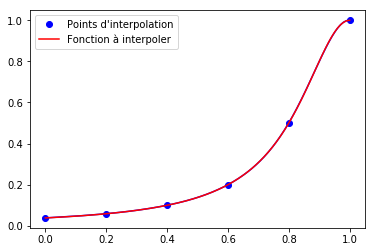

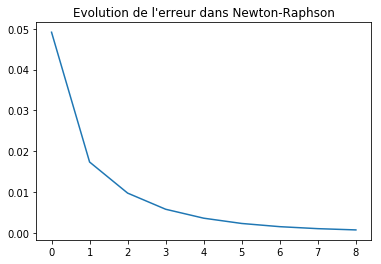

In [83]:
p = 5
h = 1/2
poln, xn, error, pol, x = interpol(p,h, m)
polynom_display(xn,poln, x, pol,h,m)

error = np.asarray(error)
if len(error) > 3 :
    plt.figure()
    plt.plot(error)
    plt.title("Evolution de l'erreur dans Newton-Raphson")

    plt.show()
else :
    print("La convergence est rapide.")

In [84]:
def s(x,h) :
    x = x*h
    return 10*(x-1/2)**4 +3

Nombre d'itérations finales :  4
Erreur Newton-Raphson :  0.0008523651426914897


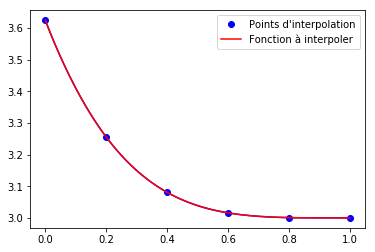

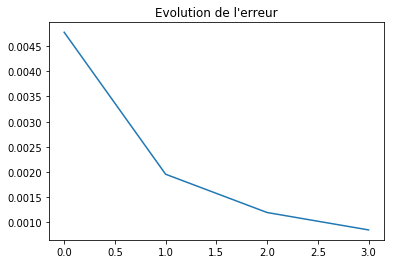

In [86]:
p = 5
h = 1/2
poln, xn, error, pol, x = interpol(p,h, s)
polynom_display(xn,poln,x, pol,h,s)

error = np.asarray(error)
if len(error) > 3 :
    plt.figure()
    plt.plot(error)
    plt.title("Evolution de l'erreur")
    plt.show()
else :
    print("La convergence est rapide.")

### Etude de h et de epsilon

In [87]:
def function1(x,h) : 
    x = x*h
    return 10**5 * (x**10)* (1-x)**7 + 0.01

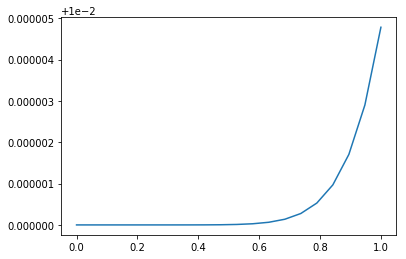

In [93]:
#Test de la fonction 

x = np.linspace(0,1,20)
plt.figure()
plt.plot(x, function1(x,0.1))
plt.show()

Nombre d'itérations finales :  1
Erreur Newton-Raphson :  1.0045752368203962e-05


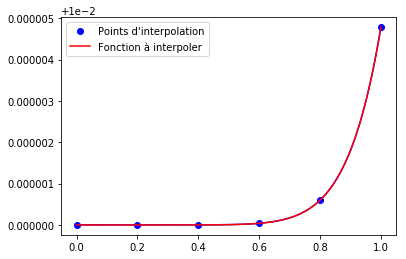

In [89]:
h = 0.1
poln ,xn, ERR, pol, x = interpol(p,h,function1, eps=1e-3)
polynom_display(xn,poln, x, pol, h, function1)

In [113]:
def polynom_display2(xn,pol,h, real_func):
    x0 = np.linspace(0,1,100)
    
    plt.plot(xn,pol, 'ob', label ="Points d'interpolation")
    plt.plot(x0, real_func(x0,h), '-r', label = "Fonction à interpoler")
    plt.title("Interpolation de la fonction")

epsilon =  0.1
Nombre d'itérations finales :  1
Erreur Newton-Raphson :  1.5067318694602236e-16


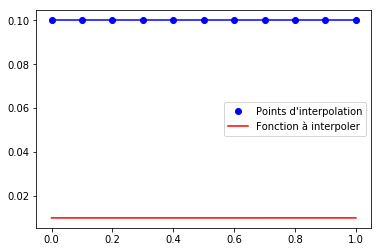

0.08999999999911112
epsilon =  0.01
Nombre d'itérations finales :  1
Erreur Newton-Raphson :  5.982979018830303e-06


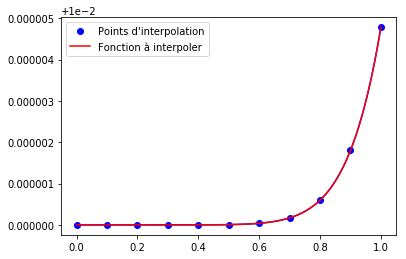

2.093427167726425e-11
epsilon =  0.001
Nombre d'itérations finales :  1
Erreur Newton-Raphson :  5.982979018830303e-06


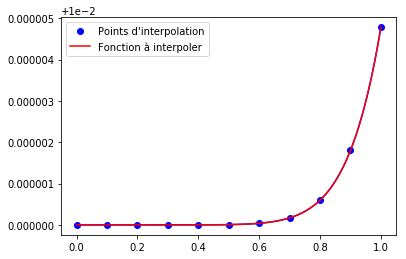

2.093427167726425e-11
epsilon =  0.0001
Nombre d'itérations finales :  1
Erreur Newton-Raphson :  5.982979018830303e-06


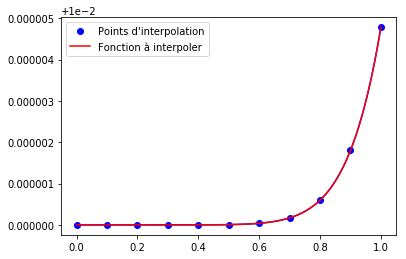

2.093427167726425e-11
epsilon =  1e-05
Nombre d'itérations finales :  1
Erreur Newton-Raphson :  5.982979018830303e-06


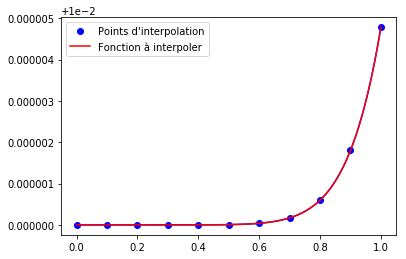

2.093427167726425e-11


In [114]:
EPS = [0.1,0.01,0.001,0.0001,0.00001]
p = 10
h = 0.1
ERR_int = []

plt.figure()
for j in EPS :
    print("epsilon = ", j)
    poln, xn,err, pol, x = interpol(p ,h, function1, j)
    polynom_display(xn, poln, x, pol, h, function1)
    ERR_int += [erreur(xn, poln, function1, h)]
plt.show()

Ordre =  2.245250926856489


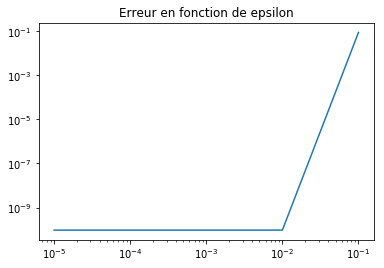

In [115]:
ERR_int = np.asarray(ERR_int)
EPS = np.asarray(EPS)
print("Ordre = ", find_order(EPS,ERR_int))


plt.figure()
plt.loglog(EPS, ERR_int)
plt.title("Erreur en fonction de epsilon")
plt.show()

Quand epsilon est trop haut, l'interpolation de la fonction est mauvaise car le polynome initial est déjà bon.
Quand espilon est trop petit, l'interpolation ne peut plus être prise en charge par le porgramme. 

h =  0.01
Nombre d'itérations finales :  1
Erreur Newton-Raphson :  1.0779309631683726e-15


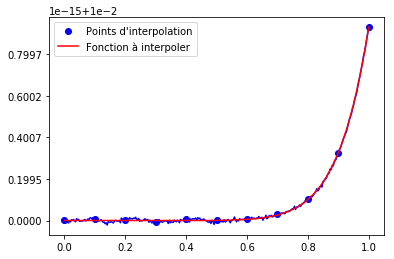

8.889590452643148e-13
h =  0.03
Nombre d'itérations finales :  1
Erreur Newton-Raphson :  5.887116104963252e-11


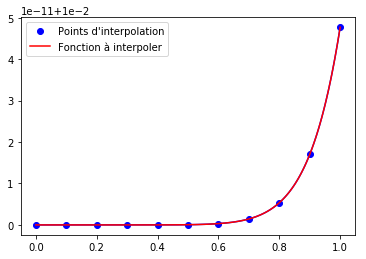

8.889590452643148e-13
h =  0.06
Nombre d'itérations finales :  1
Erreur Newton-Raphson :  4.865921626755946e-08


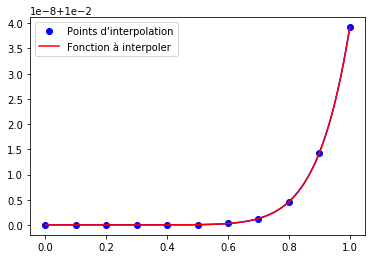

8.818796387588534e-13
h =  0.1
Nombre d'itérations finales :  1
Erreur Newton-Raphson :  5.982979018830303e-06


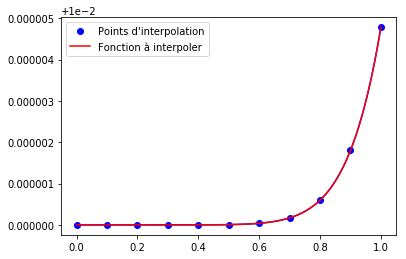

2.093427167726425e-11
h =  0.13
Nombre d'itérations finales :  1
Erreur Newton-Raphson :  6.529572969972528e-05


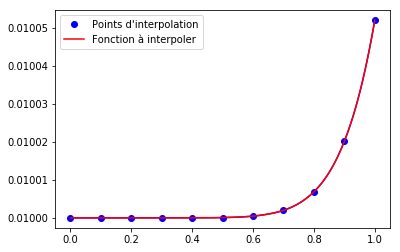

2.4601239934085584e-09
h =  0.16
Nombre d'itérations finales :  1
Erreur Newton-Raphson :  0.00040309573117376304


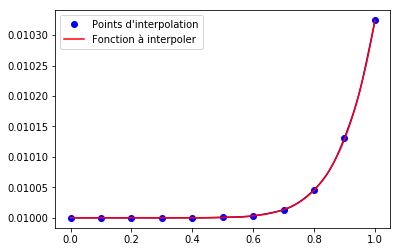

8.994443918136641e-08


In [116]:
H = [0.01,0.03,0.06,0.1,0.13,0.16]
ERR_int = []

for i in H :
    print("h = ", i)
    poln, xn, err, pol, x = interpol(p ,i, function1)
    polynom_display(xn, poln,x,pol, i, function1)
    ERR_int += [erreur(xn, poln, function1, h)]

Ordre =  1.5338328478886443


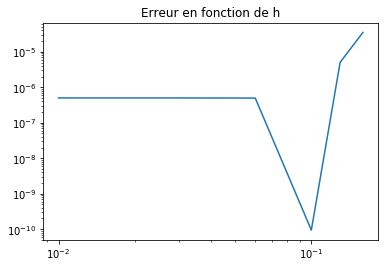

In [117]:
ERR_int = np.asarray(ERR_int)
H = np.asarray(H)
print("Ordre = ", find_order(H,ERR_int))
plt.figure()
plt.loglog(H, ERR_int)
plt.title("Erreur en fonction de h")
plt.show()

Quand h devient trop grand, il n'est plus possible de gérer l'interpolation 

### Fonction créneau

In [101]:
def creneau(x,h) : 
    x = x*h    
    return 0*(x<0.2*h) + 1*(x>=0.2*h)*(x<=0.6*h)+0*(x>0.6*h)

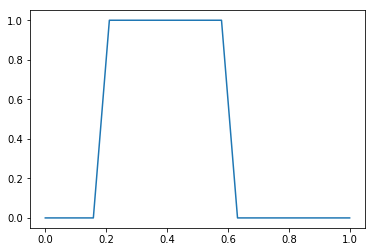

In [102]:
#Test de la fonction 

x = np.linspace(0,1,20)
plt.figure()
plt.plot(x, creneau(x,0.1))
plt.show()

Nombre d'itérations finales :  9
Erreur Newton-Raphson :  0.0009302358004402513


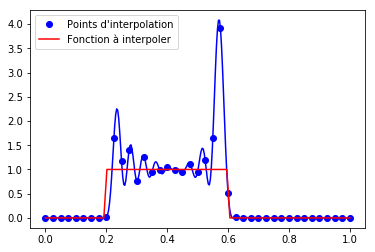

In [103]:
p = 40
h = 0.0001
poln, xn, err, pol, x = interpol(p ,h, creneau, 1e-3)
polynom_display(xn, poln,x, pol, h, creneau)
plt.savefig("creneaux_40_00001_simple.eps")

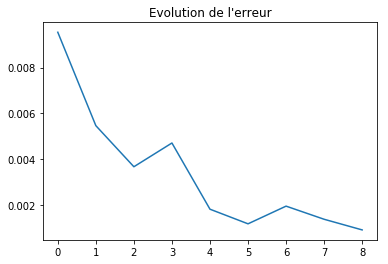

In [36]:
error = np.asarray(err)
if len(error) > 3 :
    plt.figure()
    plt.plot(error)
    plt.title("Evolution de l'erreur")
    
    plt.show()
else :
    print("La convergence est rapide.")

### Fonction sin(x) + offset

In [104]:
def sin_off(x,h) : 
    x = x*h 
    return np.sin(20*x) 

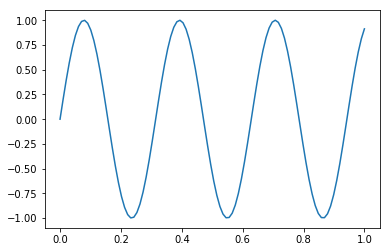

In [105]:
#Test de la fonction 

x = np.linspace(0,1,100)
plt.figure()
plt.plot(x, sin_off(x,1))
plt.show()

Nombre d'itérations finales :  1000
Erreur Newton-Raphson :  0.019042654695417365
erreur finale =  0.019042654695417365


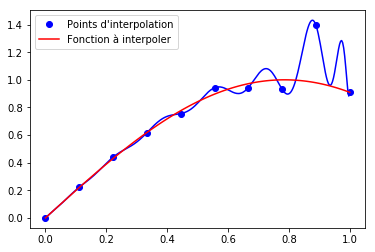

In [106]:
p = 9
h = 0.1
poln, xn, err, pol,x = interpol(p ,h, sin_off, j)
print("erreur finale = ", err[-1])
polynom_display(xn, poln, x, pol, h, sin_off)
plt.savefig("sinoff_9_01_simple.eps")

### Gaussienne très étroite

In [63]:
def gaussienne(x,h) : 
    x = x*h
    return (1/(sqrt(2*pi)*0.1)) * np.exp(-(x-0.25)**2/(2*0.1**2))

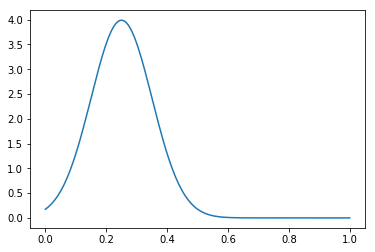

In [64]:
#Test de la fonction 

x = np.linspace(0,1,200)
plt.figure()
plt.plot(x, gaussienne(x,1))
plt.show()

P =  5
Nombre d'itérations finales :  13
Erreur Newton-Raphson :  8.444911985477121e-05


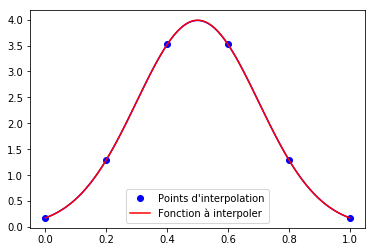

P =  15
Nombre d'itérations finales :  16
Erreur Newton-Raphson :  9.261522877020103e-05


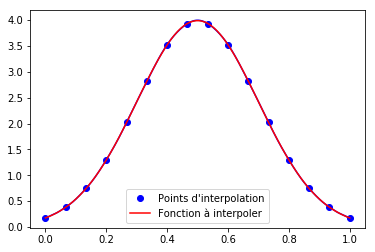

P =  25
Nombre d'itérations finales :  1000
Erreur Newton-Raphson :  0.00046684670417134985


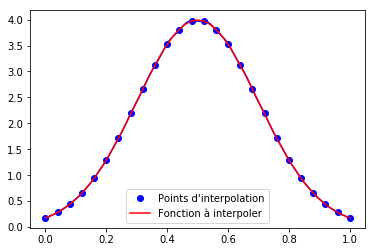

P =  35
Nombre d'itérations finales :  1000
Erreur Newton-Raphson :  0.0009910343588340792


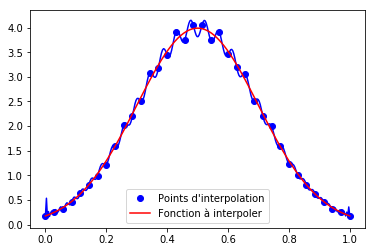

P =  45
Nombre d'itérations finales :  1000
Erreur Newton-Raphson :  0.0007006653851634985


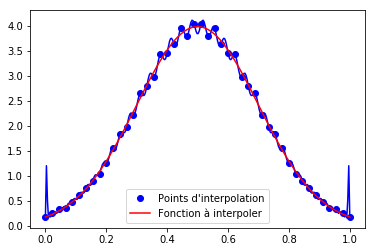

In [107]:
for P in [5,15,25,35,45] : 
    h = 1/2
    print("P = ", P)
    poln, xn, err, pol, x = interpol(P ,h, gaussienne,1e-4)
    polynom_display(xn, poln, x, pol, h, gaussienne)
    plt.savefig("gaussienne_" + str(P)+"05_evop.eps")

### Etude de l'erreur d'interpolation

In [66]:
def erreur(xn, poln, function, h) : 
    f = function(xn, h)
    dif = np.abs(f - poln)
    n = np.shape(dif)[0]
    dif = np.reshape(dif, (n))
    xn = np.reshape(xn, (n))
    som = 0
    for i in range(n-1) : 
        som += (xn[i+1]-xn[i]) * (dif[i+1]+dif[i]) / 2
    print(dif[2])
    return som 

Nombre d'itérations finales :  1000
Erreur Newton-Raphson :  0.00046684670417134985


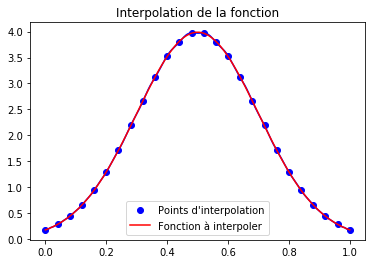

Erreur en npl.norm =  0.040648415730723746
0.0026114335193095917
Erreur en quadrature =  0.006256904724596543


In [67]:
p = 25
h = 1/2

poln, xn, err, pol, x = interpol(p ,h, gaussienne,1e-4)
polynom_display(xn, poln, x, pol, h, gaussienne)

print("Erreur en npl.norm = ", npl.norm(poln - gaussienne(xn, h)))
print("Erreur en quadrature = ", erreur(xn, poln, gaussienne,h))

In [111]:
def find_order(x, err) :
    return (log10(err[-1])-log10(err[0])) /  (log10(x[-1])-log10(x[0]))